In [1]:
# Face detection

In [295]:
import matplotlib.pyplot as plt
import glob
import cv2
import numpy as np
from tensorflow import keras

In [271]:
TRAIN_IMAGE_PATH = './datasets/face_detection/'


neg = glob.glob(TRAIN_IMAGE_PATH+'neg/*.pgm')
pos = glob.glob(TRAIN_IMAGE_PATH+'pos/*.pgm')

IMG_SIZE = 35

# For training
temp_pos = []
list(map(lambda x: temp_pos.append([cv2.resize(plt.imread(x),(IMG_SIZE,IMG_SIZE)),[1,0]]), pos[:400]))

temp_neg = []
list(map(lambda x: temp_neg.append([cv2.resize(plt.imread(x),(IMG_SIZE,IMG_SIZE)), [0,1]]), neg[:400]))

train = np.array(temp_pos + temp_neg)

# For Test
temp_pos = []
list(map(lambda x: temp_pos.append(cv2.resize(plt.imread(x),(IMG_SIZE,IMG_SIZE))), pos[100:120]))

temp_neg = []
list(map(lambda x: temp_neg.append(cv2.resize(plt.imread(x),(IMG_SIZE,IMG_SIZE))), neg[100:120]))

test_x = np.array(temp_pos + temp_neg)
test_y = np.array([[1,0]]*20 + [[0,1]]*20 )

test = test_x,test_y

In [272]:
# Shuffling training data
np.random.shuffle(train)
train_x = []
train_y = []
for data in train:
    train_x.append(data[0])
    train_y.append(data[1])
train_x = np.array(train_x)
train_y = np.array(train_y)

In [293]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(IMG_SIZE,IMG_SIZE)),
    keras.layers.Dense(128,activation='sigmoid'),
    keras.layers.Dense(128,activation='sigmoid'),
    keras.layers.Dense(2, activation='softmax')
])

model.compile(
    optimizer='SGD',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# model.summary()
model.fit(train_x,train_y, epochs= 100)

Epoch 1/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7032 - accuracy: 0.5775
Epoch 2/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6501 - accuracy: 0.7088
Epoch 3/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6277 - accuracy: 0.7487
Epoch 4/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6031 - accuracy: 0.7950
Epoch 5/100
25/25 [==============================] - 0s 1ms/step - loss: 0.5861 - accuracy: 0.7987
Epoch 6/100
25/25 [==============================] - 0s 1ms/step - loss: 0.5707 - accuracy: 0.8163
Epoch 7/100
25/25 [==============================] - 0s 1ms/step - loss: 0.5560 - accuracy: 0.8087
Epoch 8/100
25/25 [==============================] - 0s 1ms/step - loss: 0.5248 - accuracy: 0.8537
Epoch 9/100
25/25 [==============================] - 0s 1ms/step - loss: 0.5211 - accuracy: 0.8400
Epoch 10/100
25/25 [==============================] - 0s 1ms/step - loss: 0.4996 - accuracy: 0.8413
Epoch 11/

25/25 [==============================] - 0s 2ms/step - loss: 0.3890 - accuracy: 0.8413
Epoch 84/100
25/25 [==============================] - 0s 1ms/step - loss: 0.3751 - accuracy: 0.8737
Epoch 85/100
25/25 [==============================] - 0s 1ms/step - loss: 0.3997 - accuracy: 0.8750
Epoch 86/100
25/25 [==============================] - 0s 1ms/step - loss: 0.3686 - accuracy: 0.8838
Epoch 87/100
25/25 [==============================] - 0s 1ms/step - loss: 0.4008 - accuracy: 0.8425
Epoch 88/100
25/25 [==============================] - 0s 2ms/step - loss: 0.3644 - accuracy: 0.8863
Epoch 89/100
25/25 [==============================] - 0s 1ms/step - loss: 0.3289 - accuracy: 0.9013
Epoch 90/100
25/25 [==============================] - 0s 2ms/step - loss: 0.3527 - accuracy: 0.8925
Epoch 91/100
25/25 [==============================] - 0s 2ms/step - loss: 0.2964 - accuracy: 0.9187
Epoch 92/100
25/25 [==============================] - 0s 2ms/step - loss: 0.3435 - accuracy: 0.8775
Epoch 93/100


Predicted:  0 Real Output:  0 Index:  0 Real Value:  [0.61502784 0.38497216]
Predicted:  0 Real Output:  0 Index:  1 Real Value:  [0.7296651  0.27033493]
Predicted:  0 Real Output:  0 Index:  2 Real Value:  [0.8119826  0.18801741]
Predicted:  0 Real Output:  0 Index:  3 Real Value:  [0.53209823 0.4679018 ]
Predicted:  0 Real Output:  0 Index:  4 Real Value:  [0.9061909  0.09380909]
Predicted:  0 Real Output:  0 Index:  5 Real Value:  [0.83218867 0.1678113 ]
Predicted:  0 Real Output:  0 Index:  6 Real Value:  [0.90592057 0.09407945]
Predicted:  0 Real Output:  0 Index:  7 Real Value:  [0.7507996  0.24920039]
Predicted:  0 Real Output:  0 Index:  8 Real Value:  [0.8489711  0.15102889]
Predicted:  0 Real Output:  0 Index:  9 Real Value:  [0.8871044  0.11289558]
Predicted:  0 Real Output:  0 Index:  10 Real Value:  [0.8517328  0.14826718]
Predicted:  0 Real Output:  0 Index:  11 Real Value:  [0.83069456 0.16930541]
Predicted:  0 Real Output:  0 Index:  12 Real Value:  [0.90620744 0.093792

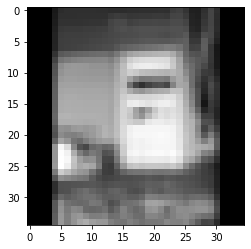

In [294]:
x = model.predict(test[0])
plt.imshow(test[0][39], cmap='gray')
i = 0
for each_x in x:
    print("Predicted: ",np.argmax(each_x), "Real Output: ",np.argmax(test[1][i]), "Index: ",i, "Real Value: ", each_x)
    i += 1